In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import joblib















      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
detection des doublons: 0
detection des valeurs manquantes: CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


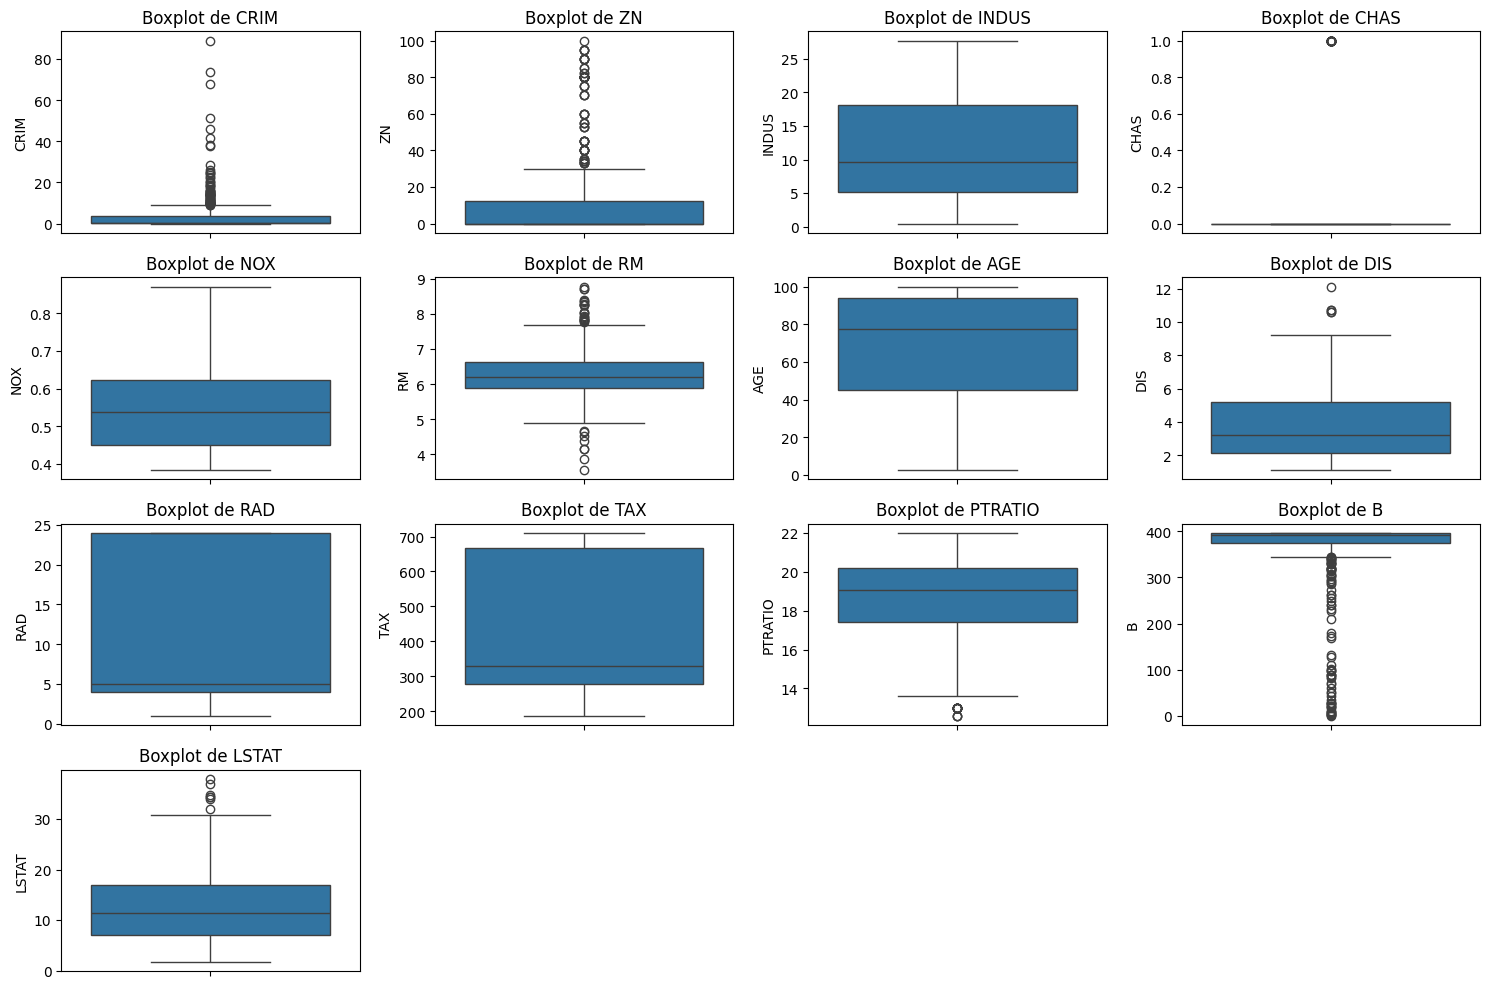

In [15]:
# Chargement des données
df = pd.read_csv("boston.csv")
print(df.head())

#traitement de données
print("detection des doublons:",df.duplicated().sum())
print("detection des valeurs manquantes:",df.isnull().sum())

# Séparation des features et de la target
X = df.drop(columns=["MEDV"])
y_regression = df["MEDV"]

# Visualisation des Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

les variables avec les outliers sont:CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT.Il n'y a pas de valeurs manquantes et de doublons.

In [ ]:
#statistiques descriptives
print(df.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
df["MEDV_class"] = (df["MEDV"] > df["MEDV"].median()).astype(int)
y_classification = df["MEDV_class"]

# Division en train/test
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)


In [4]:
# Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_clf = scaler.transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

In [5]:
# Sauvegarde du scaler
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [6]:
# Modèles de Régression
lin_reg = LinearRegression().fit(X_train, y_train_reg)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression().fit(X_train_poly, y_train_reg)
tree_reg = DecisionTreeRegressor().fit(X_train, y_train_reg)

In [7]:
# Évaluation des modèles de régression
models_reg = {"Linéaire": lin_reg, "Polynomiale": poly_reg, "Arbre": tree_reg}
for name, model in models_reg.items():
    y_pred = model.predict(X_test if name != "Polynomiale" else X_test_poly)
    print(f"{name} - MSE: {mean_squared_error(y_test_reg, y_pred)}, R2: {r2_score(y_test_reg, y_pred)}")
    joblib.dump(model, f"{name.lower()}_regression.joblib")


Linéaire - MSE: 24.291119474973517, R2: 0.668759493535632
Polynomiale - MSE: 14.267019712096262, R2: 0.8054509245635728
Arbre - MSE: 11.65656862745098, R2: 0.8410477664575509


In [8]:
# Modèles de Classification
log_reg = LogisticRegression().fit(X_train_clf, y_train_clf)
rf_clf = RandomForestClassifier().fit(X_train_clf, y_train_clf)
svm_clf = SVC().fit(X_train_clf, y_train_clf)

In [9]:
# Évaluation des modèles de classification
models_clf = {"Logistique": log_reg, "Forêt Aléatoire": rf_clf, "SVM": svm_clf}
for name, model in models_clf.items():
    y_pred = model.predict(X_test_clf)
    print(f"{name} - Accuracy: {accuracy_score(y_test_clf, y_pred)}")
    print(classification_report(y_test_clf, y_pred))
    joblib.dump(model, f"{name.lower()}_classification.joblib")


Logistique - Accuracy: 0.8725490196078431
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        60
           1       0.82      0.88      0.85        42

    accuracy                           0.87       102
   macro avg       0.87      0.87      0.87       102
weighted avg       0.88      0.87      0.87       102

Forêt Aléatoire - Accuracy: 0.8823529411764706
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        60
           1       0.83      0.90      0.86        42

    accuracy                           0.88       102
   macro avg       0.88      0.89      0.88       102
weighted avg       0.89      0.88      0.88       102

SVM - Accuracy: 0.9019607843137255
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        60
           1       0.86      0.90      0.88        42

    accuracy                           0.90       102
   m